In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
font = {'size': 16}
matplotlib.rc('font', **font)
matplotlib.rc('text',usetex=True)
import numpy as np
import camb
from camb import model, initialpower
from scipy.interpolate import interp1d
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.5.6 installed at /Users/amk/cosmocodes/CAMB_Q/camb


In [2]:
pars = camb.set_params( ombh2=0.022, omch2=0.122, H0=67.2)
pars.Accuracy.AccuracyBoost=2.
pars.Accuracy.BackgroundTimeStepBoost=2.
# print(pars)

### Exponential Quintessence

 Exponential
Exponential Quintessence: lambda = 0.0, thetamc = 0.010435, Age of Universe = 13.7671 Gyrs
Energy Densities: K = 0.000000, cdm = 0.270160, baryon = 0.048717, photon = 0.000055, neutrino = 0.000025, nu = 0.001428, de = 0.679614, 
Sum of energy densities = 1.000000

 Exponential
Exponential Quintessence: lambda = 0.5, thetamc = 0.010454, Age of Universe = 13.7187 Gyrs
Energy Densities: K = 0.000000, cdm = 0.270160, baryon = 0.048717, photon = 0.000055, neutrino = 0.000025, nu = 0.001428, de = 0.679615, 
Sum of energy densities = 1.000000

 Exponential
Exponential Quintessence: lambda = 1.0, thetamc = 0.010520, Age of Universe = 13.5572 Gyrs
Energy Densities: K = 0.000000, cdm = 0.270160, baryon = 0.048717, photon = 0.000055, neutrino = 0.000025, nu = 0.001428, de = 0.679615, 
Sum of energy densities = 1.000000

 Exponential
Exponential Quintessence: lambda = 1.5, thetamc = 0.010670, Age of Universe = 13.2127 Gyrs
Energy Densities: K = 0.000000, cdm = 0.270160, baryon = 0.048

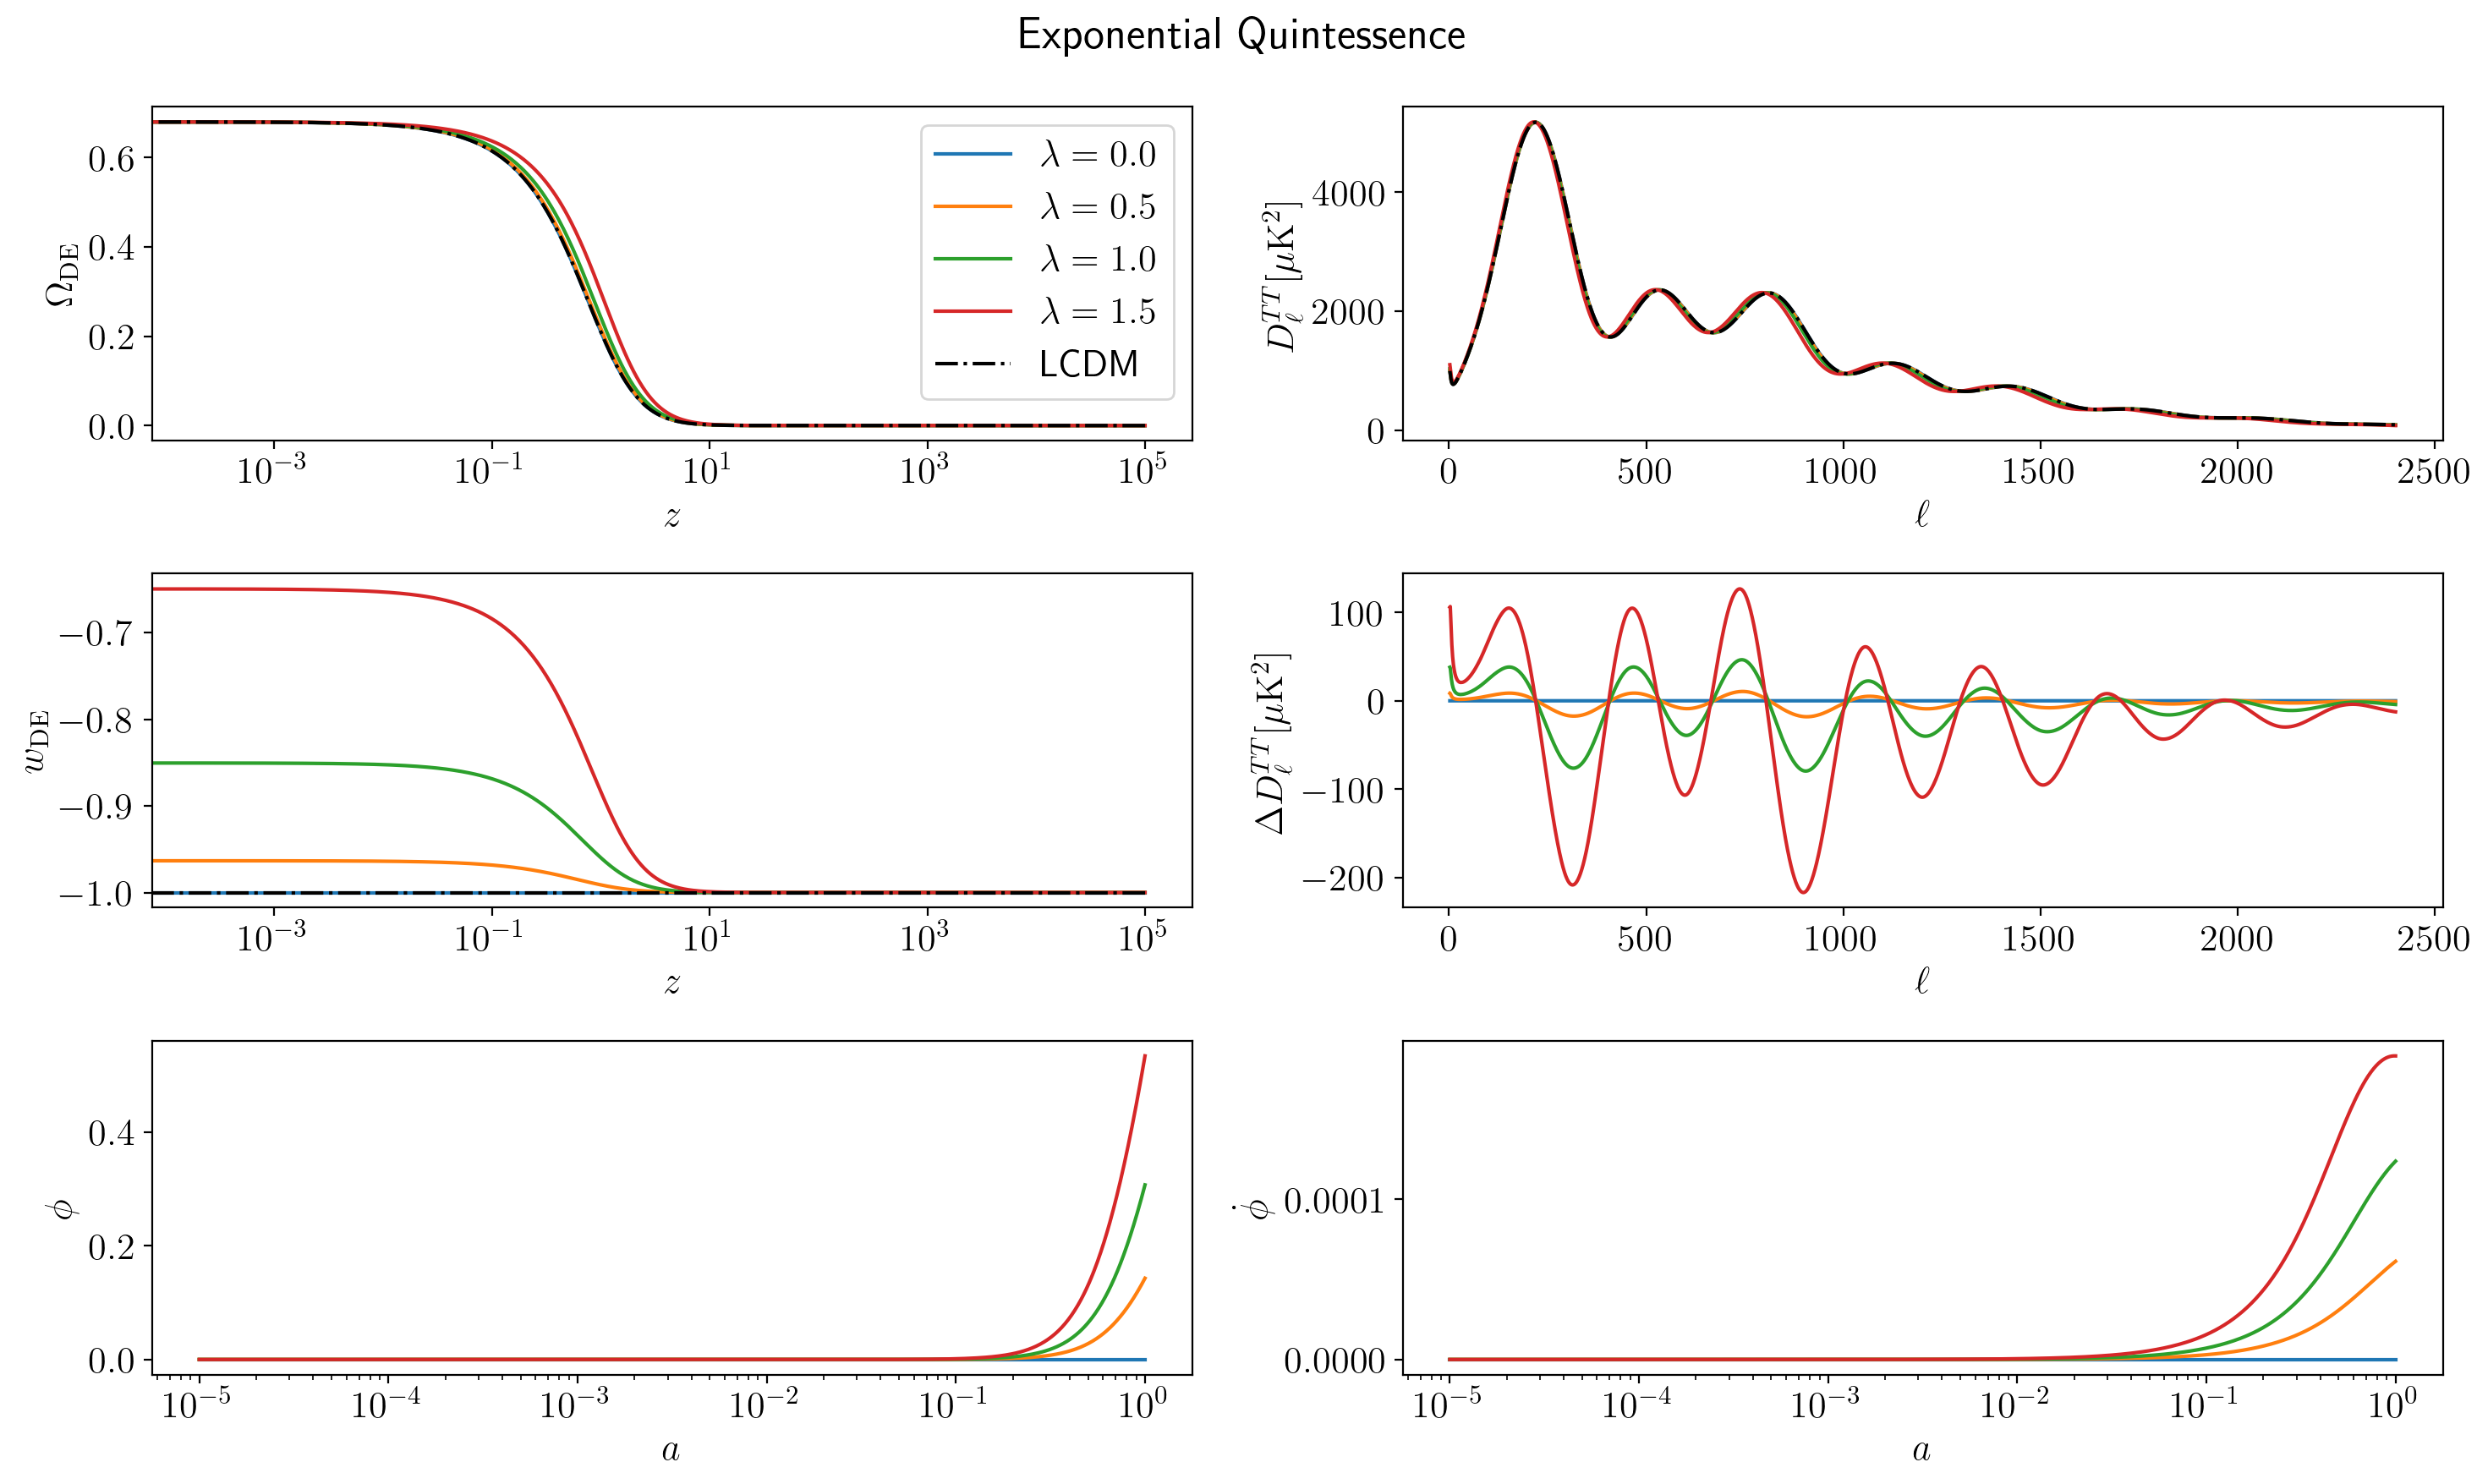

In [3]:
z1 = np.logspace(5,-2,500)
z2 = np.linspace(0.01,0.)
zs = np.concatenate((z1,z2))
scales = 1/(1+zs)

fig, ax = plt.subplots(3,2,figsize=(15,9))
ax[0,1].set_ylabel(r'$ D_\ell^{TT} [\mu {\rm K}^2]$')
ax[1,1].set_ylabel(r'$\Delta D_\ell^{TT} [\mu {\rm K}^2]$')
ax[1,1].set_xlabel(r'$\ell$')
ax[0,1].set_xlabel(r'$\ell$')
ax[0,0].set_ylabel(r'$\Omega_{\rm DE}$')
ax[1,0].set_ylabel(r'$w_{\rm DE}$')
ax[2,0].set_ylabel(r'$\phi$')
ax[0,0].set_xlabel(r'$z$')
ax[1,0].set_xlabel(r'$z$')
ax[2,0].set_xlabel(r'$a$')
ax[2,1].set_xlabel(r'$a$')
ax[2,1].set_ylabel(r'$\dot{\phi}$')

camb.set_feedback_level(level=0)
pars = camb.set_params( ombh2=0.022, omch2=0.122, H0=67.2)
results_LCDM = camb.get_results(pars);
cl_LCDM = results_LCDM.get_lensed_scalar_cls(CMB_unit='muK')
ls_LCDM = np.arange(cl_LCDM.shape[0])
# ns = [2*np.pi, 2*np.pi/3, 2*np.pi/6,2*np.pi/8] #alpha
ns = [0.,0.5,1.,1.5]
for n in ns:
    # phi_max = 1/np.sqrt(2)*np.log(1/(np.sqrt(2)*n))
    # phi_i = phi_max + 0.1 
    phi_i = 0
    pars = camb.set_params(ombh2=0.022, omch2=0.122,  omk=0.,
                       n=n, V0= 1e-10, theta_i=phi_i,model_idx=1,
                       dark_energy_model='QuintessenceModel', H0=67.2) 
    # pars.set_accuracy(AccuracyBoost=4.) 
    # camb.model.AccuracyParams(AccuracyBoost=2.,BackgroundTimeStepBoost=2.)
    results = camb.get_results(pars);
    print(f'Exponential Quintessence: lambda = {n}, thetamc = {results.cosmomc_theta():.6f}, Age of Universe = {results.physical_time(0.):.4f} Gyrs')
    om = ['K', 'cdm', 'baryon', 'photon', 'neutrino' , 'nu', 'de']
    omega0 = []
    for param in om:
        omega0.append(results.get_Omega(param))
    omdict = dict(zip(om,omega0))
    print("Energy Densities: "+"".join(f"{key} = {value:.6f}, " for key, value in omdict.items()))
    print('Sum of energy densities = {:.6f}\n'.format(sum(omega0)))
    wde = np.array(results.get_dark_energy_rho_w(1/(1+zs))).T
    ax[1,0].semilogx(zs,wde[:,1])
    ax[0,0].semilogx(zs,results.get_Omega('de',z=zs),label='$\\lambda=%s$'%n)
    cl = results.get_lensed_scalar_cls(CMB_unit='muK')
    ls = np.arange(0,cl.shape[0])
    ax[1,1].plot(ls[2:],cl[2:,0]-cl_LCDM[2:,0],label='$\\lambda=%s$'%n)
    ax[0,1].plot(ls[2:],cl[2:,0],label='$\\lambda=%s$'%n)
    ev_phi = np.array(results.get_dark_energy_phi_phidot(1/(1+zs))).T
    ax[2,0].semilogx(scales,ev_phi[:,0],label=r'$\lambda=%s$'%n)
    ax[2,1].semilogx(scales,ev_phi[:,1]/scales,label=r'$\lambda=%s$'%n)

print(f'LCDM: thetamc = {results.cosmomc_theta():.6f}')
wde = np.array(results_LCDM.get_dark_energy_rho_w(1/(1+zs))).T
om = ['K', 'cdm', 'baryon', 'photon', 'neutrino' , 'nu', 'de']
omega0 = []
for param in om:
    omega0.append(results_LCDM.get_Omega(param))
omdict = dict(zip(om,omega0))
print("Energy Densities: "+"".join(f"{key} = {value:.6f}, " for key, value in omdict.items()))
print('Sum of energy densities = {:.6f}\n'.format(sum(omega0)))
ax[0,1].plot(ls[2:],cl_LCDM[2:,0],label='LCDM',color='k',ls='-.')
ax[0,0].semilogx(zs,results_LCDM.get_Omega('de',z=zs),label=r'LCDM',color='k',ls='-.')
ax[1,0].semilogx(zs,wde[:,1],color='k',ls='-.')


ax[0,0].legend()
fig.suptitle('Exponential Quintessence')
fig.tight_layout()

#### FT hilltop

 FT Hilltop
FT Quintessence: phi0 = 1.0, thetamc = 0.010440, Age of Universe = 13.7541 Gyrs
Energy Densities: K = 0.000000, cdm = 0.270159, baryon = 0.048717, photon = 0.000055, neutrino = 0.000025, nu = 0.001428, de = 0.679615, 
Sum of energy densities = 1.000000

 FT Hilltop
FT Quintessence: phi0 = 2.0, thetamc = 0.010436, Age of Universe = 13.7649 Gyrs
Energy Densities: K = 0.000000, cdm = 0.270160, baryon = 0.048717, photon = 0.000055, neutrino = 0.000025, nu = 0.001428, de = 0.679615, 
Sum of energy densities = 1.000000

 FT Hilltop
FT Quintessence: phi0 = 3.0, thetamc = 0.010435, Age of Universe = 13.7662 Gyrs
Energy Densities: K = 0.000000, cdm = 0.270159, baryon = 0.048717, photon = 0.000055, neutrino = 0.000025, nu = 0.001428, de = 0.679615, 
Sum of energy densities = 1.000000

LCDM: thetamc = 0.010435
Energy Densities: K = 0.000000, cdm = 0.270160, baryon = 0.048717, photon = 0.000055, neutrino = 0.000025, nu = 0.001428, de = 0.679614, 
Sum of energy densities = 1.000000



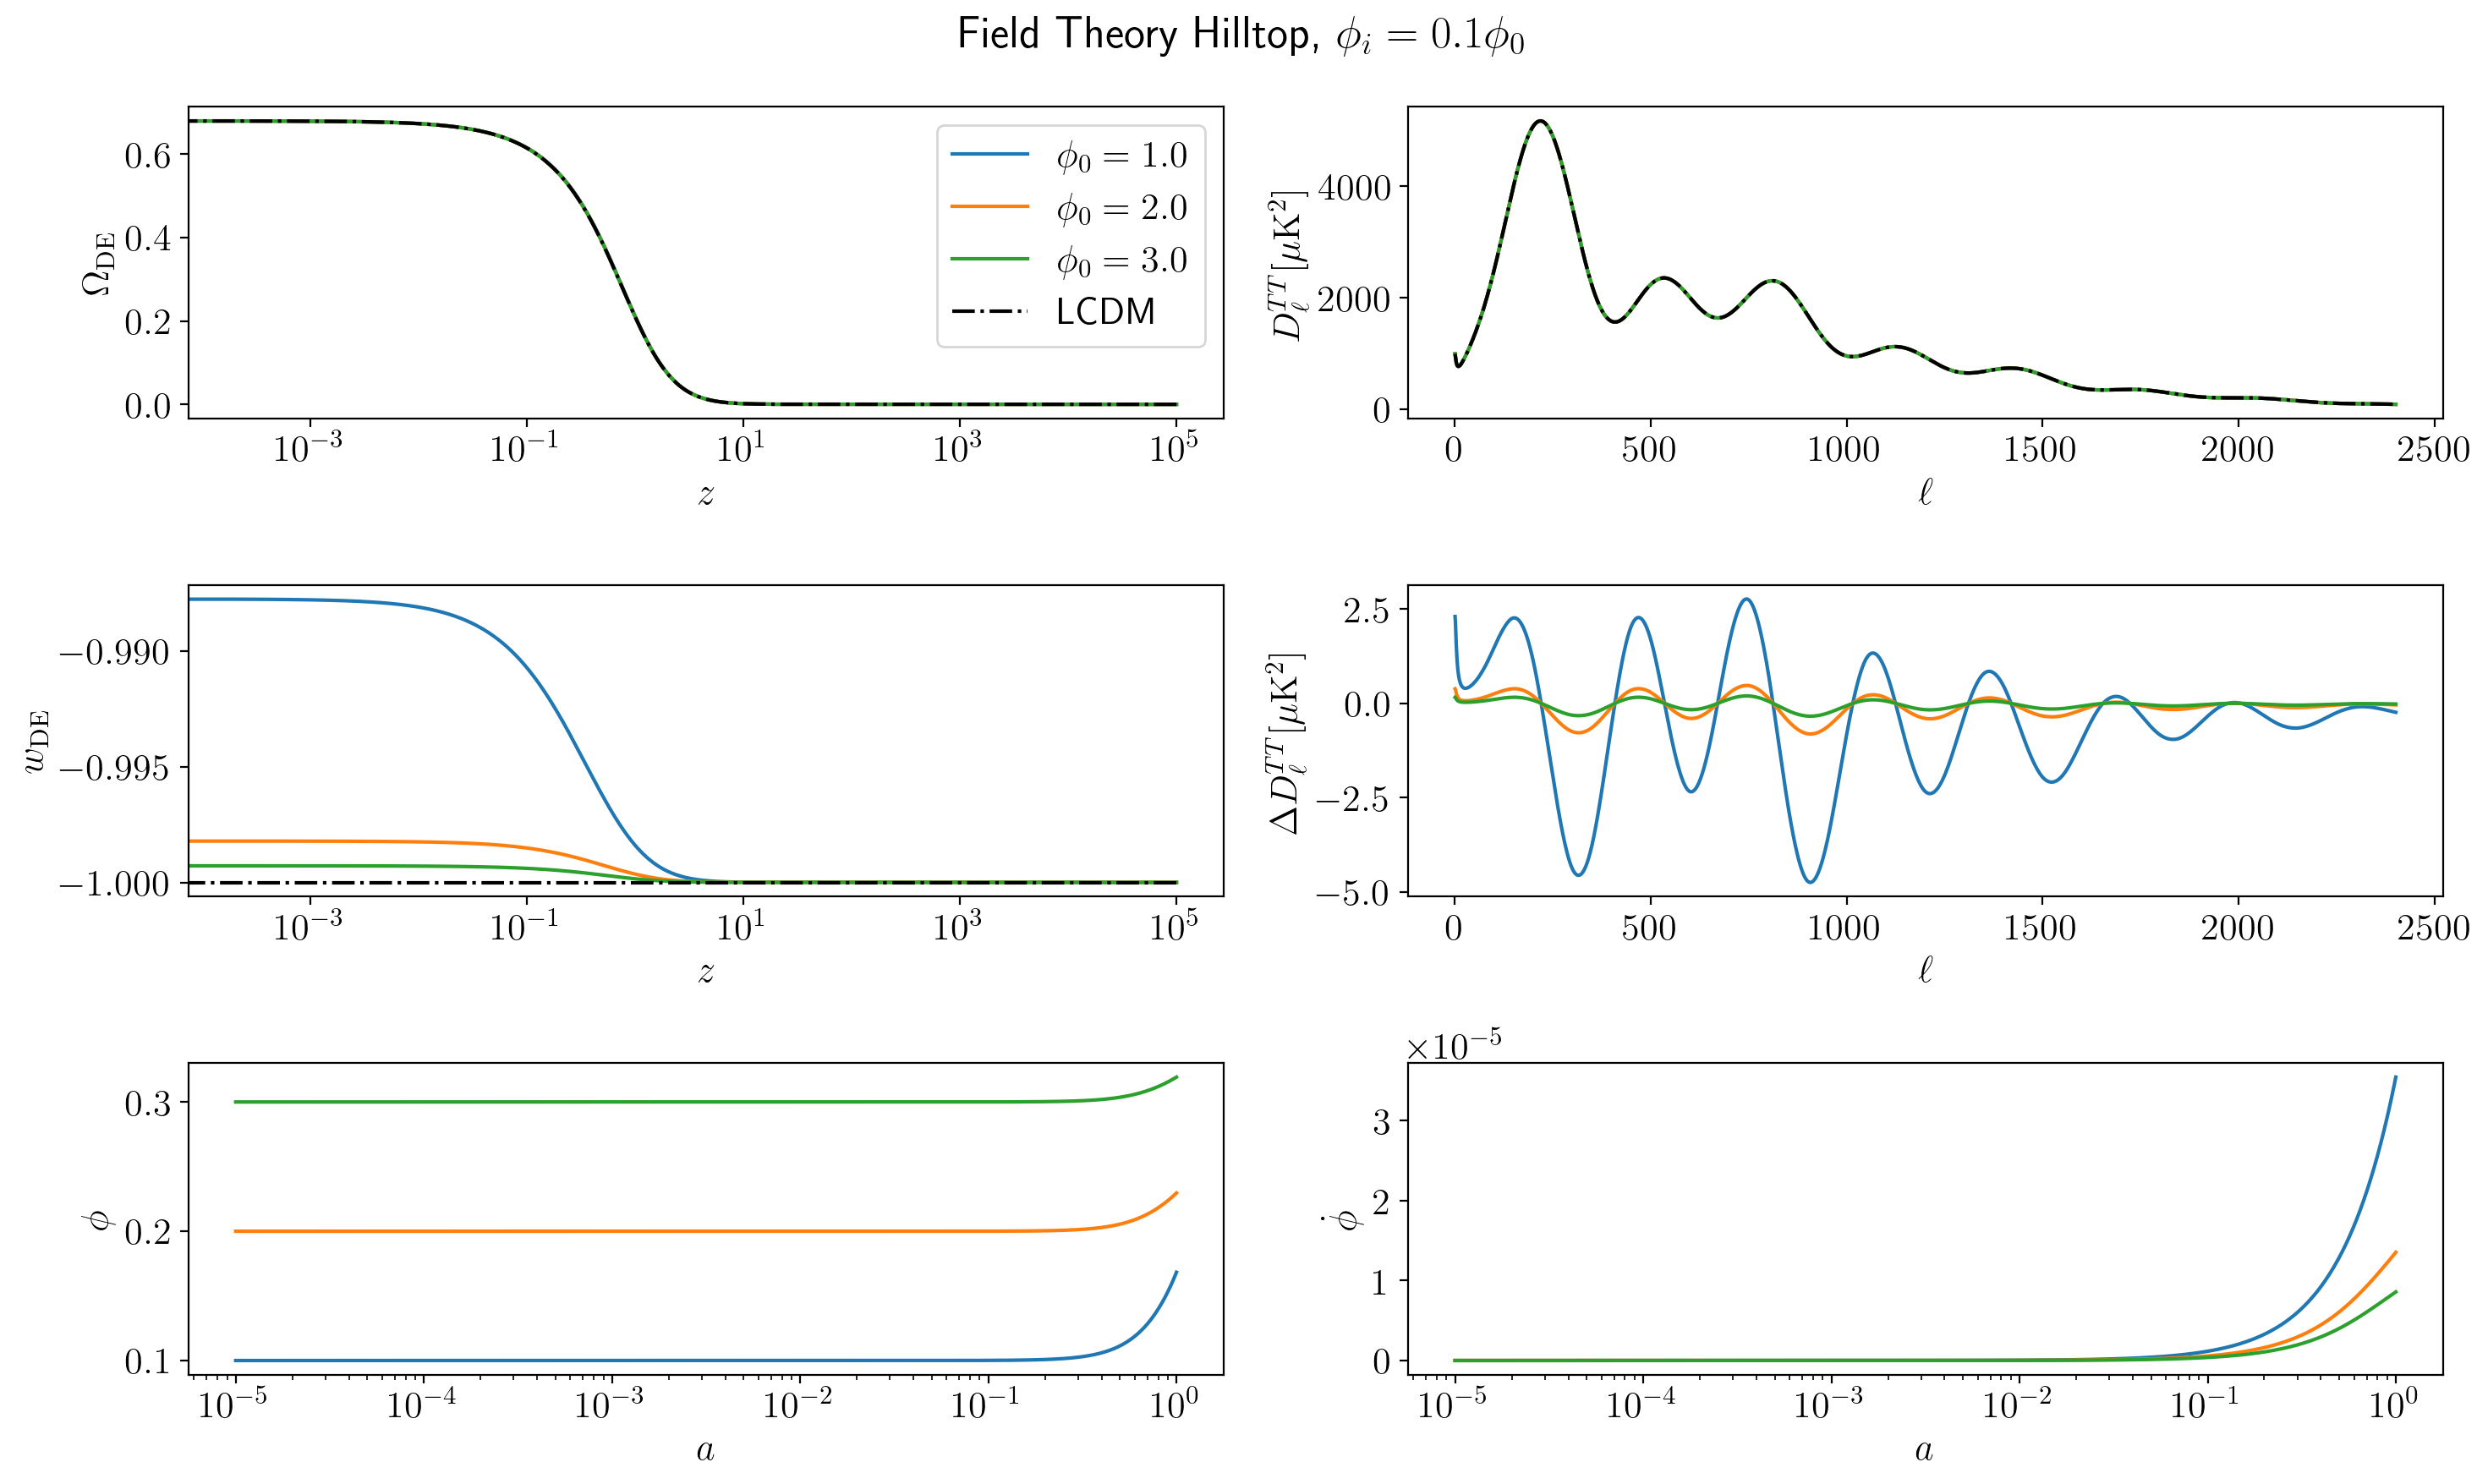

In [4]:
z1 = np.logspace(5,-2,500)
z2 = np.linspace(0.01,0.)
zs = np.concatenate((z1,z2))
scales = 1/(1+zs)

fig, ax = plt.subplots(3,2,figsize=(15,9))
ax[0,1].set_ylabel(r'$ D_\ell^{TT} [\mu {\rm K}^2]$')
ax[1,1].set_ylabel(r'$\Delta D_\ell^{TT} [\mu {\rm K}^2]$')
ax[1,1].set_xlabel(r'$\ell$')
ax[0,1].set_xlabel(r'$\ell$')
ax[0,0].set_ylabel(r'$\Omega_{\rm DE}$')
ax[1,0].set_ylabel(r'$w_{\rm DE}$')
ax[2,0].set_ylabel(r'$\phi$')
ax[0,0].set_xlabel(r'$z$')
ax[1,0].set_xlabel(r'$z$')
ax[2,0].set_xlabel(r'$a$')
ax[2,1].set_xlabel(r'$a$')
ax[2,1].set_ylabel(r'$\dot{\phi}$')

camb.set_feedback_level(level=0)
pars = camb.set_params( ombh2=0.022, omch2=0.122, H0=67.2)
results_LCDM = camb.get_results(pars);
cl_LCDM = results_LCDM.get_lensed_scalar_cls(CMB_unit='muK')
ls_LCDM = np.arange(cl_LCDM.shape[0])
ns = [1.,2.,3.]
for n in ns:
    phi_i = 0.1
    pars = camb.set_params(ombh2=0.022, omch2=0.122,  omk=0.,
                       n=n, V0= 1e-8, theta_i=phi_i*n,
                       dark_energy_model='QuintessenceModel', H0=67.2,model_idx=3) 
    # pars.set_accuracy(AccuracyBoost=4.) 
    camb.model.AccuracyParams(AccuracyBoost=2.,BackgroundTimeStepBoost=2.)
    results = camb.get_results(pars);
    print(f'FT Quintessence: phi0 = {n}, thetamc = {results.cosmomc_theta():.6f}, Age of Universe = {results.physical_time(0.):.4f} Gyrs')
    om = ['K', 'cdm', 'baryon', 'photon', 'neutrino' , 'nu', 'de']
    omega0 = []
    for param in om:
        omega0.append(results.get_Omega(param))
    omdict = dict(zip(om,omega0))
    print("Energy Densities: "+"".join(f"{key} = {value:.6f}, " for key, value in omdict.items()))
    print('Sum of energy densities = {:.6f}\n'.format(sum(omega0)))
    wde = np.array(results.get_dark_energy_rho_w(1/(1+zs))).T
    ax[1,0].semilogx(zs,wde[:,1])
    ax[0,0].semilogx(zs,results.get_Omega('de',z=zs),label='$\\phi_0=%s$'%n)
    cl = results.get_lensed_scalar_cls(CMB_unit='muK')
    ls = np.arange(0,cl.shape[0])
    ax[1,1].plot(ls[2:],cl[2:,0]-cl_LCDM[2:,0],label='$\\lambda=%s$'%n)
    ax[0,1].plot(ls[2:],cl[2:,0],label='$\\lambda=%s$'%n)
    ev_phi = np.array(results.get_dark_energy_phi_phidot(1/(1+zs))).T
    ax[2,0].semilogx(scales,ev_phi[:,0],label=r'$\lambda=%s$'%n)
    ax[2,1].semilogx(scales,ev_phi[:,1]/scales,label=r'$\lambda=%s$'%n)

print(f'LCDM: thetamc = {results.cosmomc_theta():.6f}')
wde = np.array(results_LCDM.get_dark_energy_rho_w(1/(1+zs))).T
om = ['K', 'cdm', 'baryon', 'photon', 'neutrino' , 'nu', 'de']
omega0 = []
for param in om:
    omega0.append(results_LCDM.get_Omega(param))
omdict = dict(zip(om,omega0))
print("Energy Densities: "+"".join(f"{key} = {value:.6f}, " for key, value in omdict.items()))
print('Sum of energy densities = {:.6f}\n'.format(sum(omega0)))
ax[0,1].plot(ls[2:],cl_LCDM[2:,0],label='LCDM',color='k',ls='-.')
ax[0,0].semilogx(zs,results_LCDM.get_Omega('de',z=zs),label=r'LCDM',color='k',ls='-.')
ax[1,0].semilogx(zs,wde[:,1],color='k',ls='-.')


ax[0,0].legend()
fig.suptitle(r'Field Theory Hilltop, $\phi_i = %s \phi_0$'%phi_i)
fig.tight_layout()

 FT Hilltop
FT Quintessence: phi_i = 0.001, thetamc = 0.010435, Age of Universe = 13.7671 Gyrs
Energy Densities: K = 0.000000, cdm = 0.270161, baryon = 0.048718, photon = 0.000055, neutrino = 0.000025, nu = 0.001428, de = 0.679614, 
Sum of energy densities = 1.000000

 FT Hilltop
FT Quintessence: phi_i = 0.01, thetamc = 0.010435, Age of Universe = 13.7670 Gyrs
Energy Densities: K = 0.000000, cdm = 0.270160, baryon = 0.048717, photon = 0.000055, neutrino = 0.000025, nu = 0.001428, de = 0.679614, 
Sum of energy densities = 1.000000

 FT Hilltop
FT Quintessence: phi_i = 0.1, thetamc = 0.010440, Age of Universe = 13.7541 Gyrs
Energy Densities: K = 0.000000, cdm = 0.270159, baryon = 0.048717, photon = 0.000055, neutrino = 0.000025, nu = 0.001428, de = 0.679615, 
Sum of energy densities = 1.000000

LCDM: thetamc = 0.010440
Energy Densities: K = 0.000000, cdm = 0.270160, baryon = 0.048717, photon = 0.000055, neutrino = 0.000025, nu = 0.001428, de = 0.679614, 
Sum of energy densities = 1.00000

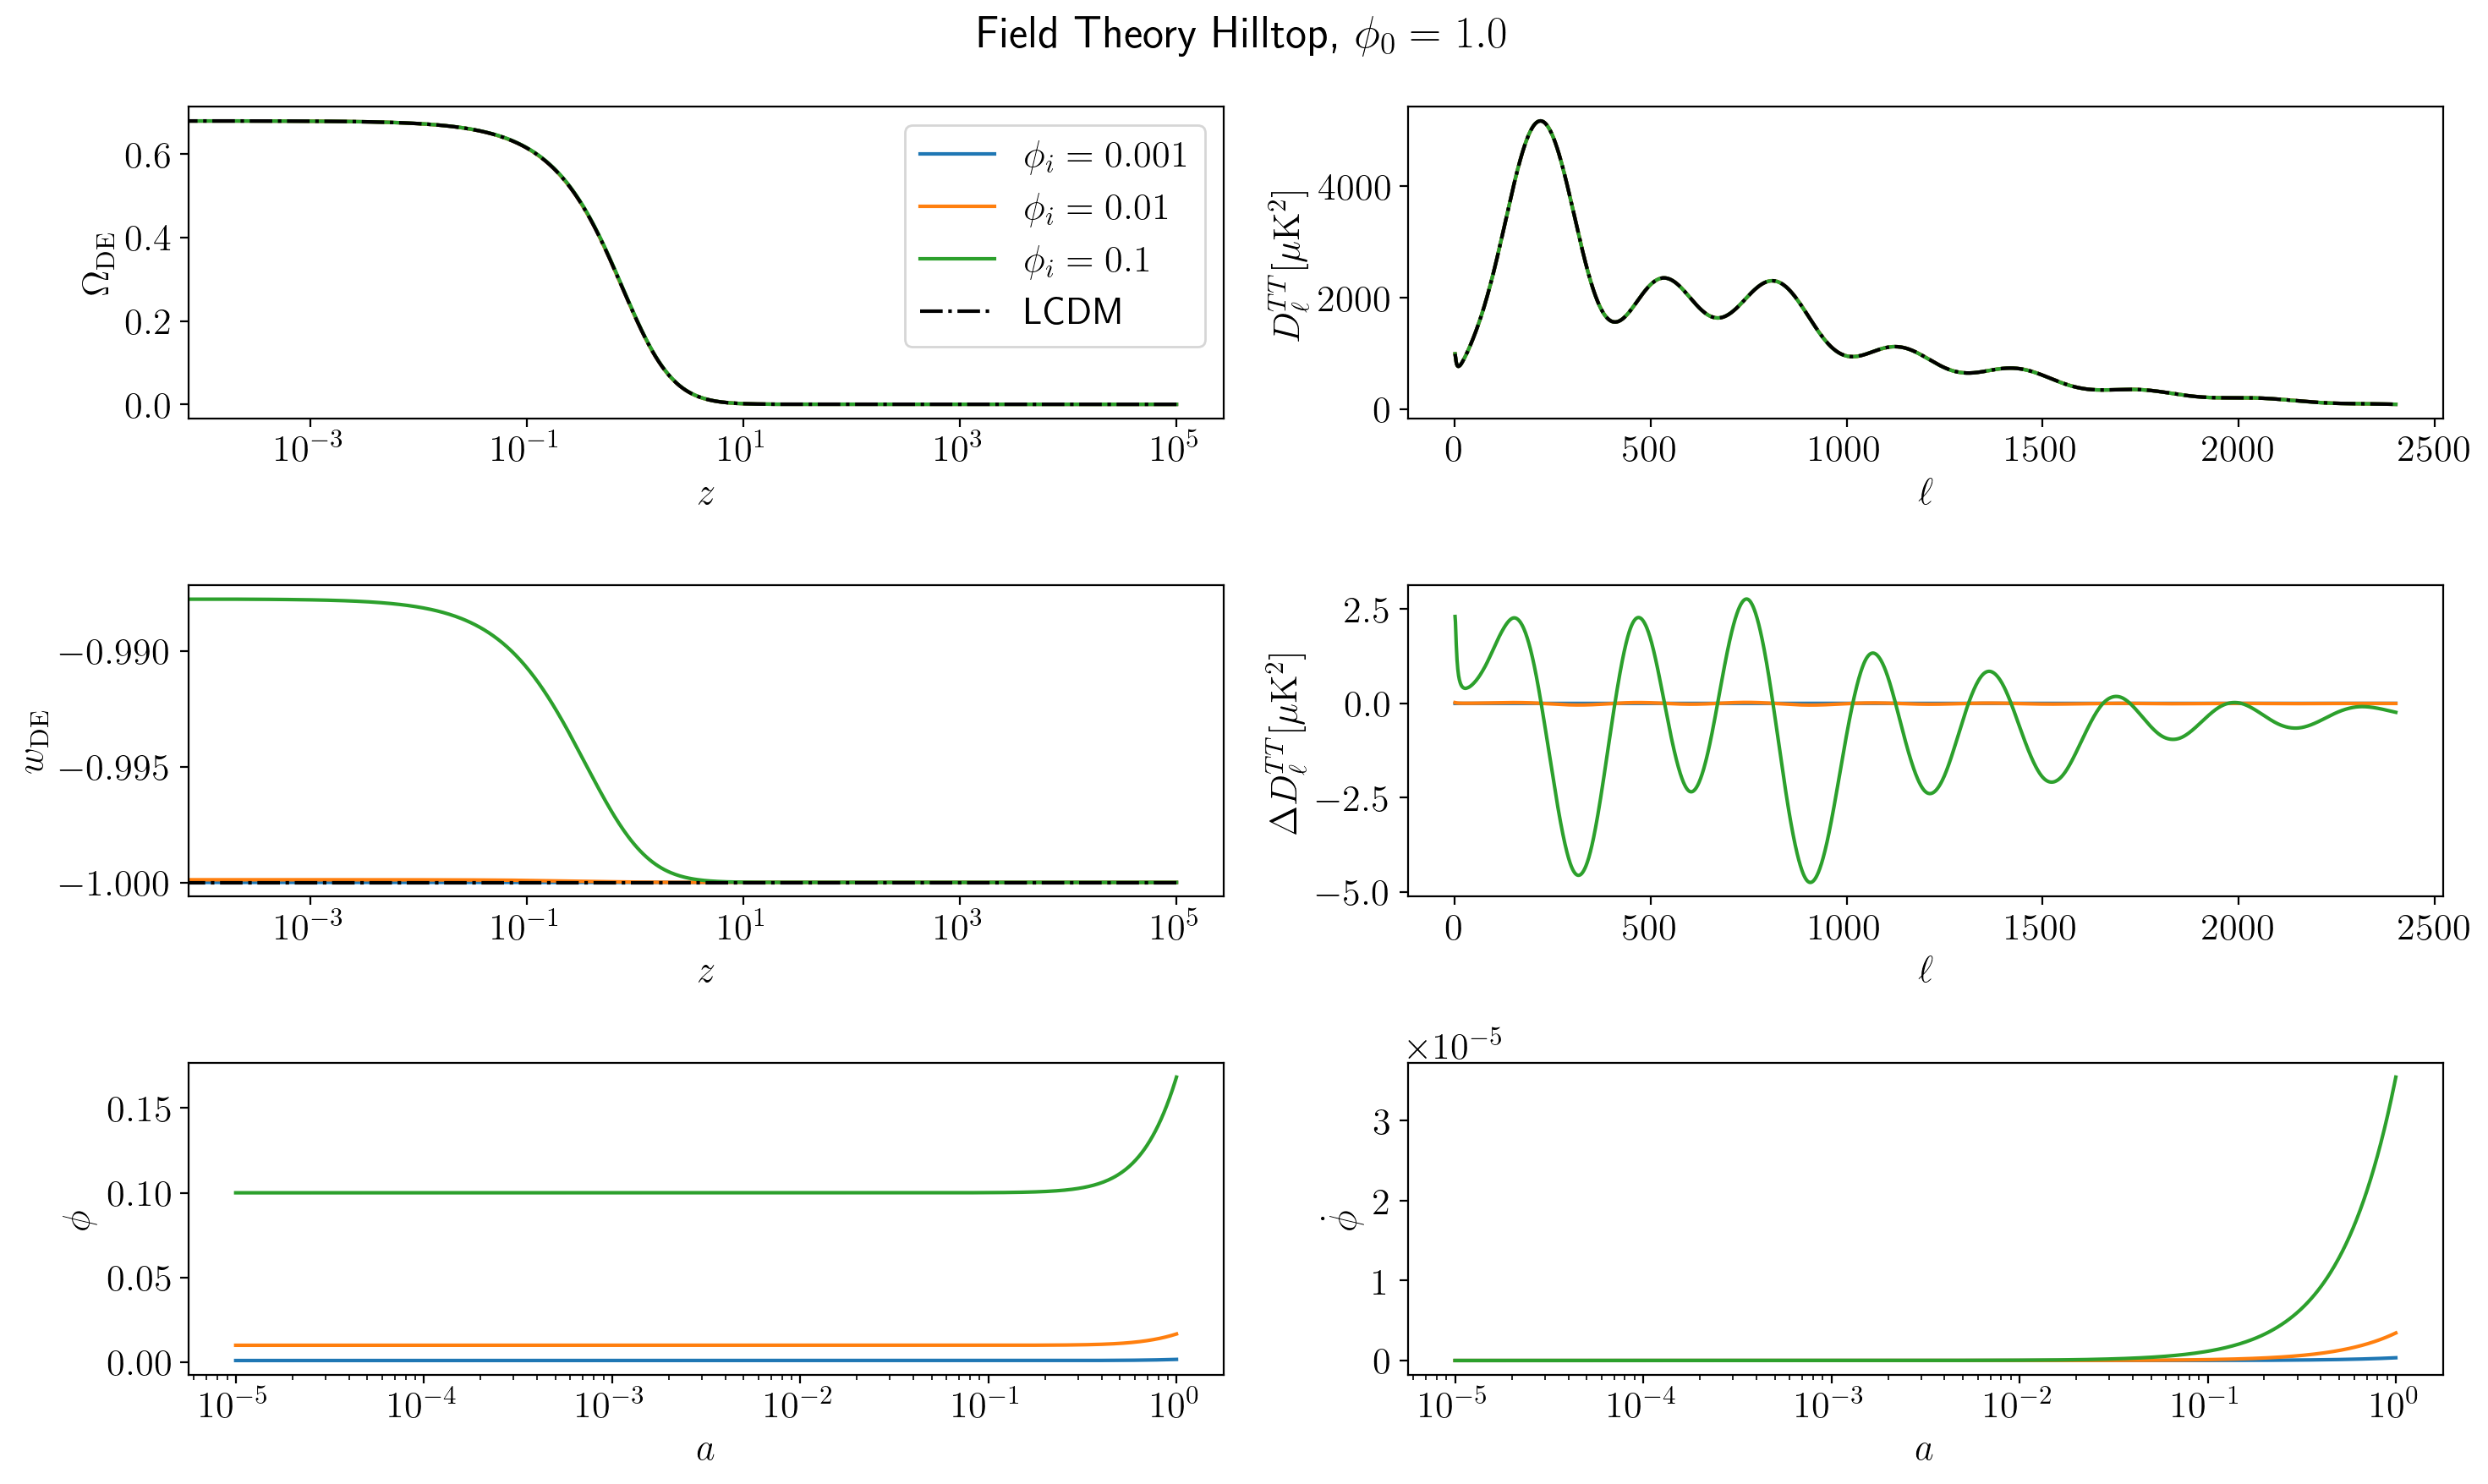

In [5]:
z1 = np.logspace(5,-2,500)
z2 = np.linspace(0.01,0.)
zs = np.concatenate((z1,z2))
scales = 1/(1+zs)

fig, ax = plt.subplots(3,2,figsize=(15,9))
ax[0,1].set_ylabel(r'$ D_\ell^{TT} [\mu {\rm K}^2]$')
ax[1,1].set_ylabel(r'$\Delta D_\ell^{TT} [\mu {\rm K}^2]$')
ax[1,1].set_xlabel(r'$\ell$')
ax[0,1].set_xlabel(r'$\ell$')
ax[0,0].set_ylabel(r'$\Omega_{\rm DE}$')
ax[1,0].set_ylabel(r'$w_{\rm DE}$')
ax[2,0].set_ylabel(r'$\phi$')
ax[0,0].set_xlabel(r'$z$')
ax[1,0].set_xlabel(r'$z$')
ax[2,0].set_xlabel(r'$a$')
ax[2,1].set_xlabel(r'$a$')
ax[2,1].set_ylabel(r'$\dot{\phi}$')

camb.set_feedback_level(level=0)
pars = camb.set_params( ombh2=0.022, omch2=0.122, H0=67.2)
results_LCDM = camb.get_results(pars);
cl_LCDM = results_LCDM.get_lensed_scalar_cls(CMB_unit='muK')
ls_LCDM = np.arange(cl_LCDM.shape[0])
# ns = [2*np.pi, 2*np.pi/3, 2*np.pi/6,2*np.pi/8] #alpha
thetas = [0.001,0.01,0.1]
phi0 = 1.
for n in thetas:
    pars = camb.set_params(ombh2=0.022, omch2=0.122,  omk=0.,
                       n=phi0, V0= 1e-8, theta_i=n,
                       dark_energy_model='QuintessenceModel', H0=67.2,model_idx=3) 
    # pars.set_accuracy(AccuracyBoost=4.) 
    camb.model.AccuracyParams(AccuracyBoost=2.,BackgroundTimeStepBoost=2.)
    results = camb.get_results(pars);
    print(f'FT Quintessence: phi_i = {n}, thetamc = {results.cosmomc_theta():.6f}, Age of Universe = {results.physical_time(0.):.4f} Gyrs')
    om = ['K', 'cdm', 'baryon', 'photon', 'neutrino' , 'nu', 'de']
    omega0 = []
    for param in om:
        omega0.append(results.get_Omega(param))
    omdict = dict(zip(om,omega0))
    print("Energy Densities: "+"".join(f"{key} = {value:.6f}, " for key, value in omdict.items()))
    print('Sum of energy densities = {:.6f}\n'.format(sum(omega0)))
    wde = np.array(results.get_dark_energy_rho_w(1/(1+zs))).T
    ax[1,0].semilogx(zs,wde[:,1])
    ax[0,0].semilogx(zs,results.get_Omega('de',z=zs),label='$\\phi_i=%s$'%n)
    cl = results.get_lensed_scalar_cls(CMB_unit='muK')
    ls = np.arange(0,cl.shape[0])
    ax[1,1].plot(ls[2:],cl[2:,0]-cl_LCDM[2:,0],label='$\\lambda=%s$'%n)
    ax[0,1].plot(ls[2:],cl[2:,0],label='$\\lambda=%s$'%n)
    ev_phi = np.array(results.get_dark_energy_phi_phidot(1/(1+zs))).T
    ax[2,0].semilogx(scales,ev_phi[:,0],label=r'$\lambda=%s$'%n)
    ax[2,1].semilogx(scales,ev_phi[:,1]/scales,label=r'$\lambda=%s$'%n)

print(f'LCDM: thetamc = {results.cosmomc_theta():.6f}')
wde = np.array(results_LCDM.get_dark_energy_rho_w(1/(1+zs))).T
om = ['K', 'cdm', 'baryon', 'photon', 'neutrino' , 'nu', 'de']
omega0 = []
for param in om:
    omega0.append(results_LCDM.get_Omega(param))
omdict = dict(zip(om,omega0))
print("Energy Densities: "+"".join(f"{key} = {value:.6f}, " for key, value in omdict.items()))
print('Sum of energy densities = {:.6f}\n'.format(sum(omega0)))
ax[0,1].plot(ls[2:],cl_LCDM[2:,0],label='LCDM',color='k',ls='-.')
ax[0,0].semilogx(zs,results_LCDM.get_Omega('de',z=zs),label=r'LCDM',color='k',ls='-.')
ax[1,0].semilogx(zs,wde[:,1],color='k',ls='-.')


ax[0,0].legend()
fig.suptitle(r'Field Theory Hilltop, $\phi_0=%s$'%phi0)
fig.tight_layout()

#### Cosine Potential

 Cosine potential
FT Quintessence: phi_i = 1.0, thetamc = 0.010435, Age of Universe = 13.7666 Gyrs
Energy Densities: K = 0.000000, cdm = 0.270160, baryon = 0.048717, photon = 0.000055, neutrino = 0.000025, nu = 0.001428, de = 0.679614, 
Sum of energy densities = 1.000000

 Cosine potential
FT Quintessence: phi_i = 0.3, thetamc = 0.010443, Age of Universe = 13.7465 Gyrs
Energy Densities: K = 0.000000, cdm = 0.270160, baryon = 0.048717, photon = 0.000055, neutrino = 0.000025, nu = 0.001428, de = 0.679615, 
Sum of energy densities = 1.000000

 Cosine potential
FT Quintessence: phi_i = 0.22, thetamc = 0.010484, Age of Universe = 13.6341 Gyrs
Energy Densities: K = 0.000000, cdm = 0.270160, baryon = 0.048717, photon = 0.000055, neutrino = 0.000025, nu = 0.001428, de = 0.679615, 
Sum of energy densities = 1.000000

LCDM: thetamc = 0.010484
Energy Densities: K = 0.000000, cdm = 0.270160, baryon = 0.048717, photon = 0.000055, neutrino = 0.000025, nu = 0.001428, de = 0.679614, 
Sum of energy den

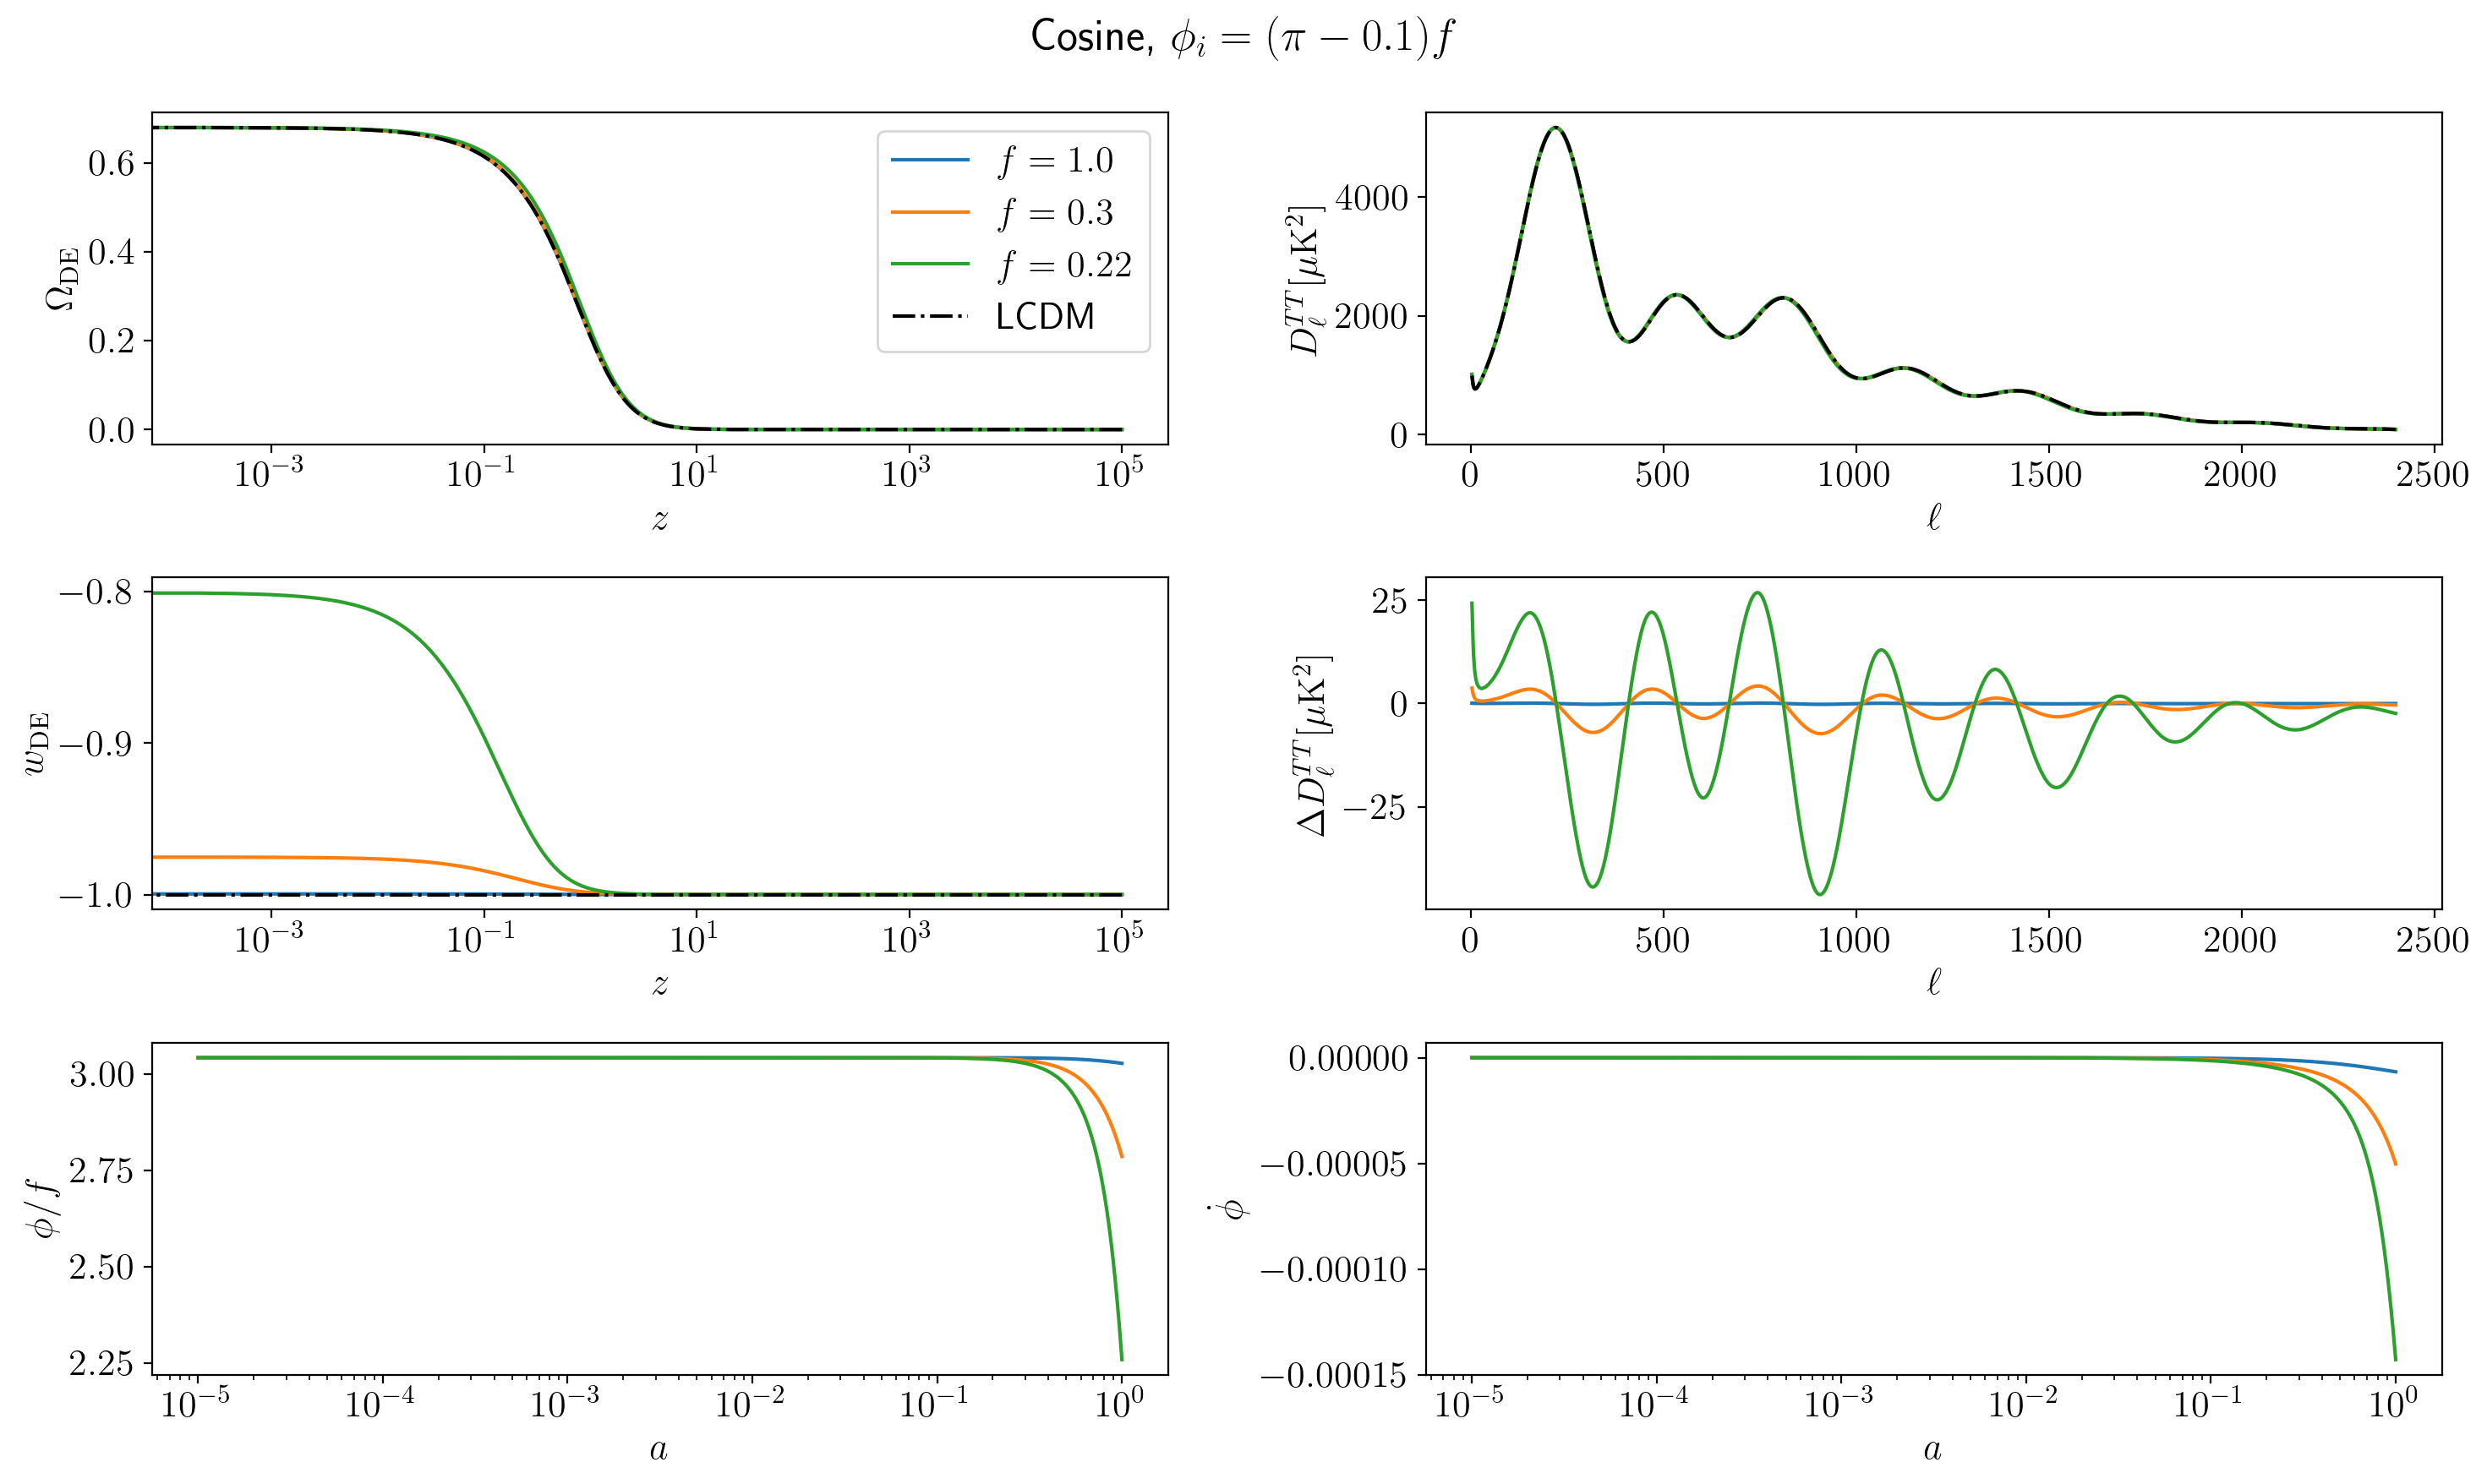

In [34]:
z1 = np.logspace(5,-2,500)
z2 = np.linspace(0.01,0.)
zs = np.concatenate((z1,z2))
scales = 1/(1+zs)

fig, ax = plt.subplots(3,2,figsize=(15,9))
ax[0,1].set_ylabel(r'$ D_\ell^{TT} [\mu {\rm K}^2]$')
ax[1,1].set_ylabel(r'$\Delta D_\ell^{TT} [\mu {\rm K}^2]$')
ax[1,1].set_xlabel(r'$\ell$')
ax[0,1].set_xlabel(r'$\ell$')
ax[0,0].set_ylabel(r'$\Omega_{\rm DE}$')
ax[1,0].set_ylabel(r'$w_{\rm DE}$')
ax[2,0].set_ylabel(r'$\phi/f$')
ax[0,0].set_xlabel(r'$z$')
ax[1,0].set_xlabel(r'$z$')
ax[2,0].set_xlabel(r'$a$')
ax[2,1].set_xlabel(r'$a$')
ax[2,1].set_ylabel(r'$\dot{\phi}$')

camb.set_feedback_level(level=0)
pars = camb.set_params( ombh2=0.022, omch2=0.122, H0=67.2)
results_LCDM = camb.get_results(pars);
cl_LCDM = results_LCDM.get_lensed_scalar_cls(CMB_unit='muK')
ls_LCDM = np.arange(cl_LCDM.shape[0])
# ns = [2*np.pi, 2*np.pi/3, 2*np.pi/6,2*np.pi/8] #alpha
f = [1.,0.3,0.22]
thetas = (np.pi-0.1)*np.array(f)
for i,n in enumerate(f):
    pars = camb.set_params(ombh2=0.022, omch2=0.122,  omk=0.,
                       n=n, V0= 1e-8, theta_i=thetas[i],
                       dark_energy_model='QuintessenceModel', H0=67.2,model_idx=4) 
    # pars.set_accuracy(AccuracyBoost=4.) 
    camb.model.AccuracyParams(AccuracyBoost=2.,BackgroundTimeStepBoost=2.)
    results = camb.get_results(pars);
    print(f'FT Quintessence: phi_i = {n}, thetamc = {results.cosmomc_theta():.6f}, Age of Universe = {results.physical_time(0.):.4f} Gyrs')
    om = ['K', 'cdm', 'baryon', 'photon', 'neutrino' , 'nu', 'de']
    omega0 = []
    for param in om:
        omega0.append(results.get_Omega(param))
    omdict = dict(zip(om,omega0))
    print("Energy Densities: "+"".join(f"{key} = {value:.6f}, " for key, value in omdict.items()))
    print('Sum of energy densities = {:.6f}\n'.format(sum(omega0)))
    wde = np.array(results.get_dark_energy_rho_w(1/(1+zs))).T
    ax[1,0].semilogx(zs,wde[:,1])
    ax[0,0].semilogx(zs,results.get_Omega('de',z=zs),label=f'$f={n}$')
    cl = results.get_lensed_scalar_cls(CMB_unit='muK')
    ls = np.arange(0,cl.shape[0])
    ax[1,1].plot(ls[2:],cl[2:,0]-cl_LCDM[2:,0])
    ax[0,1].plot(ls[2:],cl[2:,0])
    ev_phi = np.array(results.get_dark_energy_phi_phidot(1/(1+zs))).T
    ax[2,0].semilogx(scales,ev_phi[:,0]/n)
    ax[2,1].semilogx(scales,ev_phi[:,1]/scales)

print(f'LCDM: thetamc = {results.cosmomc_theta():.6f}')
wde = np.array(results_LCDM.get_dark_energy_rho_w(1/(1+zs))).T
om = ['K', 'cdm', 'baryon', 'photon', 'neutrino' , 'nu', 'de']
omega0 = []
for param in om:
    omega0.append(results_LCDM.get_Omega(param))
omdict = dict(zip(om,omega0))
print("Energy Densities: "+"".join(f"{key} = {value:.6f}, " for key, value in omdict.items()))
print('Sum of energy densities = {:.6f}\n'.format(sum(omega0)))
ax[0,1].plot(ls[2:],cl_LCDM[2:,0],label='LCDM',color='k',ls='-.')
ax[0,0].semilogx(zs,results_LCDM.get_Omega('de',z=zs),label=r'LCDM',color='k',ls='-.')
ax[1,0].semilogx(zs,wde[:,1],color='k',ls='-.')


ax[0,0].legend()
fig.suptitle(r'Cosine, $\phi_i=(\pi-0.1)f$')
fig.tight_layout()

#### Sugra (still in testing)

In [35]:
# z1 = np.logspace(5,-2,500)
# z2 = np.linspace(0.01,0.)
# zs = np.concatenate((z1,z2))
# scales = 1/(1+zs)

# fig, ax = plt.subplots(3,2,figsize=(15,9))
# ax[0,1].set_ylabel(r'$ D_\ell^{TT} [\mu {\rm K}^2]$')
# ax[1,1].set_ylabel(r'$\Delta D_\ell^{TT} [\mu {\rm K}^2]$')
# ax[1,1].set_xlabel(r'$\ell$')
# ax[0,1].set_xlabel(r'$\ell$')
# ax[0,0].set_ylabel(r'$\Omega_{\rm DE}$')
# ax[1,0].set_ylabel(r'$w_{\rm DE}$')
# ax[2,0].set_ylabel(r'$\phi$')
# ax[0,0].set_xlabel(r'$z$')
# ax[1,0].set_xlabel(r'$z$')
# ax[2,0].set_xlabel(r'$a$')
# ax[2,1].set_xlabel(r'$a$')
# ax[2,1].set_ylabel(r'$\dot{\phi}$')

# camb.set_feedback_level(level=0)
# pars = camb.set_params( ombh2=0.022, omch2=0.122, H0=67.2)
# results_LCDM = camb.get_results(pars);
# cl_LCDM = results_LCDM.get_lensed_scalar_cls(CMB_unit='muK')
# ls_LCDM = np.arange(cl_LCDM.shape[0])
# ns = [2*np.pi, 2*np.pi/3 ,2*np.pi/6,2*np.pi/8] #alphas # larger than ~ 2pi/3 not working for now 
# # camb.set_feedback_level(level=1)
# for i,n in enumerate(ns):
#     phi_max = 1/np.sqrt(2)*np.log(1/(np.sqrt(2)*n))
#     print(phi_max)
#     phi_i = phi_max+0.01
#     pars = camb.set_params(ombh2=0.022, omch2=0.122,  omk=0.,
#                        n=n, V0= 1e-4, theta_i=phi_i,
#                        dark_energy_model='QuintessenceModel', H0=67.2,model_idx=2) 
#     # pars.set_accuracy(AccuracyBoost=4.) 
#     camb.model.AccuracyParams(AccuracyBoost=2.,BackgroundTimeStepBoost=2.)
#     results = camb.get_results(pars);
#     print(f'Sugra Quintessence: alpha = {n}, thetamc = {results.cosmomc_theta():.6f}, Age of Universe = {results.physical_time(0.):.4f} Gyrs')
#     om = ['K', 'cdm', 'baryon', 'photon', 'neutrino' , 'nu', 'de']
#     omega0 = []
#     for param in om:
#         omega0.append(results.get_Omega(param))
#     omdict = dict(zip(om,omega0))
#     print("Energy Densities: "+"".join(f"{key} = {value:.6f}, " for key, value in omdict.items()))
#     print('Sum of energy densities = {:.6f}\n'.format(sum(omega0)))
#     wde = np.array(results.get_dark_energy_rho_w(1/(1+zs))).T
#     ax[1,0].semilogx(zs,wde[:,1])
#     labels = [3,4,6,8]
#     ax[0,0].semilogx(zs,results.get_Omega('de',z=zs),label=f'$\\alpha=2\\pi/%s$'%labels[i])
#     cl = results.get_lensed_scalar_cls(CMB_unit='muK')
#     ls = np.arange(0,cl.shape[0])
#     ax[1,1].plot(ls[2:],cl[2:,0]-cl_LCDM[2:,0])
#     ax[0,1].plot(ls[2:],cl[2:,0])
#     ev_phi = np.array(results.get_dark_energy_phi_phidot(1/(1+zs))).T
#     ax[2,0].semilogx(scales,ev_phi[:,0])
#     ax[2,1].semilogx(scales,ev_phi[:,1]/scales)

# print(f'LCDM: thetamc = {results.cosmomc_theta():.6f}')
# wde = np.array(results_LCDM.get_dark_energy_rho_w(1/(1+zs))).T
# om = ['K', 'cdm', 'baryon', 'photon', 'neutrino' , 'nu', 'de']
# omega0 = []
# for param in om:
#     omega0.append(results_LCDM.get_Omega(param))
# omdict = dict(zip(om,omega0))
# print("Energy Densities: "+"".join(f"{key} = {value:.6f}, " for key, value in omdict.items()))
# print('Sum of energy densities = {:.6f}\n'.format(sum(omega0)))
# ax[0,1].plot(ls[2:],cl_LCDM[2:,0],label='LCDM',color='k',ls='-.')
# ax[0,0].semilogx(zs,results_LCDM.get_Omega('de',z=zs),label=r'LCDM',color='k',ls='-.')
# ax[1,0].semilogx(zs,wde[:,1],color='k',ls='-.')


# ax[0,0].legend()
# fig.suptitle('Sugra Hilltop')
# fig.tight_layout()

In [36]:
# z1 = np.logspace(5,-2,500)
# z2 = np.linspace(0.01,0.)
# zs = np.concatenate((z1,z2))
# scales = 1/(1+zs)

# fig, ax = plt.subplots(3,2,figsize=(15,9))
# ax[0,1].set_ylabel(r'$ D_\ell^{TT} [\mu {\rm K}^2]$')
# ax[1,1].set_ylabel(r'$\Delta D_\ell^{TT} [\mu {\rm K}^2]$')
# ax[1,1].set_xlabel(r'$\ell$')
# ax[0,1].set_xlabel(r'$\ell$')
# ax[0,0].set_ylabel(r'$\Omega_{\rm DE}$')
# ax[1,0].set_ylabel(r'$w_{\rm DE}$')
# ax[2,0].set_ylabel(r'$\phi$')
# ax[0,0].set_xlabel(r'$z$')
# ax[1,0].set_xlabel(r'$z$')
# ax[2,0].set_xlabel(r'$a$')
# ax[2,1].set_xlabel(r'$a$')
# ax[2,1].set_ylabel(r'$\dot{\phi}$')

# camb.set_feedback_level(level=0)
# pars = camb.set_params( ombh2=0.022, omch2=0.122, H0=67.2)
# results_LCDM = camb.get_results(pars);
# cl_LCDM = results_LCDM.get_lensed_scalar_cls(CMB_unit='muK')
# ls_LCDM = np.arange(cl_LCDM.shape[0])
# alpha = 2*np.pi/4 #alphas # larger than ~ 2pi/3 not working for now 
# # camb.set_feedback_level(level=1)
# phi_offset = [0.1,1,10,15]
# for i,n in enumerate(phi_offset):
#     phi_max = 1/np.sqrt(2)*np.log(1/(np.sqrt(2)*alpha))
#     print(phi_max)
#     phi_i = phi_max + n
#     pars = camb.set_params(ombh2=0.022, omch2=0.122,  omk=0.,
#                        n=alpha, V0= 1e-4, theta_i=phi_i,
#                        dark_energy_model='QuintessenceModel', H0=67.2,model_idx=2) 
#     # pars.set_accuracy(AccuracyBoost=4.) 
#     camb.model.AccuracyParams(AccuracyBoost=2.,BackgroundTimeStepBoost=2.)
#     results = camb.get_results(pars);
#     print(f'Sugra Quintessence: alpha = 2pi/4, thetamc = {results.cosmomc_theta():.6f}, Age of Universe = {results.physical_time(0.):.4f} Gyrs')
#     om = ['K', 'cdm', 'baryon', 'photon', 'neutrino' , 'nu', 'de']
#     omega0 = []
#     for param in om:
#         omega0.append(results.get_Omega(param))
#     omdict = dict(zip(om,omega0))
#     print("Energy Densities: "+"".join(f"{key} = {value:.6f}, " for key, value in omdict.items()))
#     print('Sum of energy densities = {:.6f}\n'.format(sum(omega0)))
#     wde = np.array(results.get_dark_energy_rho_w(1/(1+zs))).T
#     ax[1,0].semilogx(zs,wde[:,1])
#     ax[0,0].semilogx(zs,results.get_Omega('de',z=zs),label=r'$\phi_i=\phi_{\mathrm{max}} + %s$'%phi_offset[i])
#     cl = results.get_lensed_scalar_cls(CMB_unit='muK')
#     ls = np.arange(0,cl.shape[0])
#     ax[1,1].plot(ls[2:],cl[2:,0]-cl_LCDM[2:,0])
#     ax[0,1].plot(ls[2:],cl[2:,0])
#     ev_phi = np.array(results.get_dark_energy_phi_phidot(1/(1+zs))).T
#     ax[2,0].semilogx(scales,ev_phi[:,0])
#     ax[2,1].semilogx(scales,ev_phi[:,1]/scales)

# print(f'LCDM: thetamc = {results.cosmomc_theta():.6f}')
# wde = np.array(results_LCDM.get_dark_energy_rho_w(1/(1+zs))).T
# om = ['K', 'cdm', 'baryon', 'photon', 'neutrino' , 'nu', 'de']
# omega0 = []
# for param in om:
#     omega0.append(results_LCDM.get_Omega(param))
# omdict = dict(zip(om,omega0))
# print("Energy Densities: "+"".join(f"{key} = {value:.6f}, " for key, value in omdict.items()))
# print('Sum of energy densities = {:.6f}\n'.format(sum(omega0)))
# ax[0,1].plot(ls[2:],cl_LCDM[2:,0],label='LCDM',color='k',ls='-.')
# ax[0,0].semilogx(zs,results_LCDM.get_Omega('de',z=zs),label=r'LCDM',color='k',ls='-.')
# ax[1,0].semilogx(zs,wde[:,1],color='k',ls='-.')


# ax[0,0].legend()
# fig.suptitle(r'Sugra Hilltop, $\alpha = 2\pi/4$')
# fig.tight_layout()